
📊 Predicted Prices on Unseen Data:

   Property_Type  Total_Area_sqft  Num_Rooms  Num_Dining_Area  Num_Washrooms  \
0              2             3008          6                1              1   

   Num_Balconies  Floor_Level  Year_Built  Price_per_sqft  \
0              2           16        1990            3000   

   Predicted_Estimated_Price  
0               9,490,855.77  
✅ Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.99      1.00      1.00       148

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200

✅ Confusion Matrix:


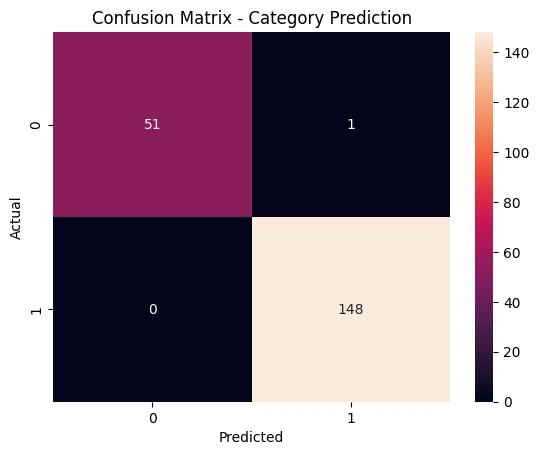

✅ Accuracy: 0.99
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.99      1.00      1.00       148

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



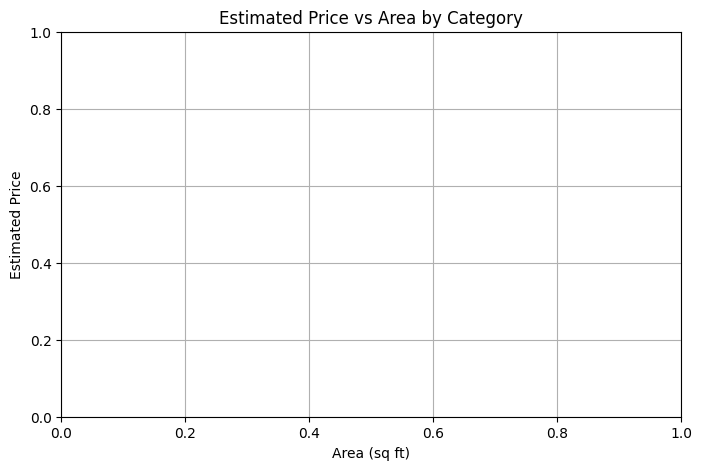

ValueError: Could not interpret value `Rooms` for `x`. An entry with this name does not appear in `data`.

<Figure size 800x500 with 0 Axes>

In [10]:
# 📦 Required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

data = pd.read_csv("C:/Users/Lenovo/Downloads/Property_Dataset.csv")

# Label Encoding
encoder = LabelEncoder()
data['Property_Type'] = encoder.fit_transform(data['Property_Type'])
data['Category'] = encoder.fit_transform(data['Category'])

# Features and target
X = data.drop(['Estimated_Price', 'Category'], axis=1)
y = data['Estimated_Price']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# 2️⃣ Load unseen data
unseen_data = pd.read_csv(r"C:/Users/Lenovo/Downloads/unseen_data.csv")

# 3️⃣ Handle unseen 'Property_Type' labels
allowed_labels = list(encoder.classes_)

# Detect and handle unknowns
if not set(unseen_data['Property_Type']).issubset(set(allowed_labels)):
    unseen_data['Property_Type'] = unseen_data['Property_Type'].apply(
        lambda x: x if x in allowed_labels else 'Unknown'
    )
    if 'Unknown' not in encoder.classes_:
        encoder.classes_ = np.append(encoder.classes_, 'Unknown')

# Encode 'Property_Type'
unseen_data['Property_Type'] = encoder.transform(unseen_data['Property_Type'])

# 4️⃣ Drop irrelevant columns if present
cols_to_drop = ['Estimated_Price', 'Category']
for col in cols_to_drop:
    if col in unseen_data.columns:
        unseen_data = unseen_data.drop(col, axis=1)

# 5️⃣ Predict using trained model
unseen_predictions = reg_model.predict(unseen_data)

# 6️⃣ Add predictions to the unseen data
unseen_data['Predicted_Estimated_Price'] = unseen_predictions

# Format the display of predicted prices
pd.options.display.float_format = '{:,.2f}'.format  # Two decimal places with commas

print("\n📊 Predicted Prices on Unseen Data:\n")
print(unseen_data)


# 2nd qurions answer 


# 📌 Encode Category for classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Encode 'Category' (Luxury = 1, Standard = 0)
category_encoder = LabelEncoder()
data['Category'] = category_encoder.fit_transform(data['Category'])

# 📌 Features and target for classification
X_cls = data.drop(['Estimated_Price', 'Category'], axis=1)
y_cls = data['Category']

# 📌 Split for classification
X_cls_train, X_cls_test, y_cls_train, y_cls_test = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

# 📌 Train classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_cls_train, y_cls_train)

# 📌 Predict on test set
y_cls_pred = clf.predict(X_cls_test)

# 📌 Evaluation
print("✅ Classification Report:")
print(classification_report(y_cls_test, y_cls_pred, target_names=category_encoder.classes_.astype(str)))


print("✅ Confusion Matrix:")
sns.heatmap(confusion_matrix(y_cls_test, y_cls_pred), annot=True, fmt='d',
            xticklabels=category_encoder.classes_,
            yticklabels=category_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Category Prediction")
plt.show()

print(f"✅ Accuracy: {accuracy_score(y_cls_test, y_cls_pred):.2f}")

# 📈 Price vs Area
plt.figure(figsize=(8,5))
print(classification_report(y_cls_test, y_cls_pred, target_names=category_encoder.classes_.astype(str)))
plt.title("Estimated Price vs Area by Category")
plt.xlabel("Area (sq ft)")
plt.ylabel("Estimated Price")
plt.grid()
plt.show()

# 📈 Price vs Number of Rooms
plt.figure(figsize=(8,5))
sns.boxplot(data=data, x='Rooms', y='Estimated_Price', hue='Category')
plt.title("Estimated Price vs Number of Rooms")
plt.xlabel("Rooms")
plt.ylabel("Estimated Price")
plt.grid()
plt.show()

# 📈 Price vs Year Built
plt.figure(figsize=(10,6))
sns.lineplot(data=data.sort_values('Year_Built'), x='Year_Built', y='Estimated_Price', hue='Category')
plt.title("Estimated Price Trend Over Year Built")
plt.xlabel("Year Built")
plt.ylabel("Estimated Price")
plt.grid()
plt.show()




